In [1]:
import sys
import math
import pandas
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

sys.path.insert(0, "../python")
from common import *
from WeightManager import WeightManager

C:\Users\konst\AppData\Roaming\Python\Python36\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df_all = pandas.read_hdf('20L1024N50D_relu_0723_s1p2_weight_upd.hdf5')
df_all.tail()

,cl_idx,eff,eff_err,epoch,eta_bin_id,eta_max,eta_min,is_updated,n_passed,n_taus,pt_bin_id,pt_max,pt_min,sf,target_eff,threashold
886,1,0.825412,0.117314,342,6,1.4,1.2,0.0,92.0,112.0,26,1000.0,900.0,1.0,0.9,0.998317
887,1,0.750354,0.136820,342,7,1.6,1.4,1.0,54.0,71.0,26,1000.0,900.0,2.0,0.9,0.998317
888,1,0.806069,0.192503,342,8,1.8,1.6,0.0,32.0,41.0,26,1000.0,900.0,1.0,0.9,0.998317
889,1,0.892236,0.298861,342,9,2.0,1.8,0.0,17.0,19.0,26,1000.0,900.0,1.0,0.9,0.998317
890,1,0.920354,0.493426,342,10,2.3,2.0,0.0,7.0,8.0,26,1000.0,900.0,1.0,0.9,0.998317


In [3]:
last_epoch = np.amax(df_all.epoch)
df = df_all[df_all.epoch == last_epoch]
df_e = df[df.cl_idx == e]
df_mu = df[df.cl_idx == mu]
df_jet = df[df.cl_idx == 2]

In [6]:
pt_bins, eta_bins, pteta_bins = WeightManager.CreateBins()

In [5]:
pt_bins_offline, pteta_bins_offline = WeightManager.CreateBins()

In [8]:
n_eta_bins = len(eta_bins) - 1
pt_centers = (pt_bins[1:] + pt_bins[:-1]) / 2
pt_errors = (pt_bins[1:] - pt_bins[:-1]) / 2

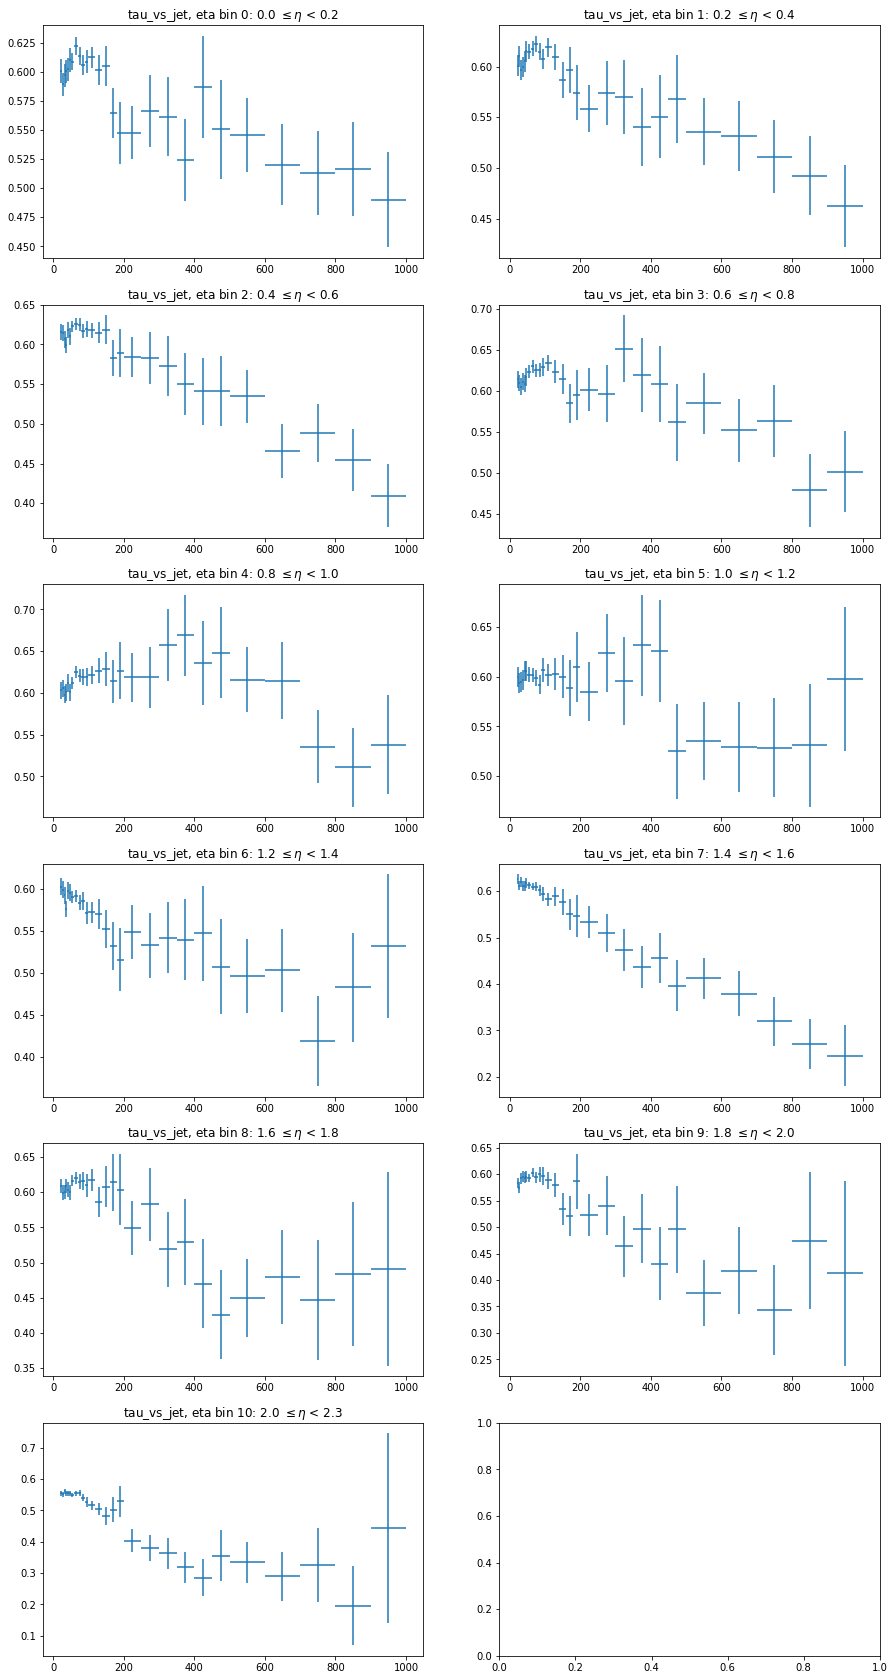

In [7]:
fig, ax = plt.subplots(math.ceil(n_eta_bins / 2), 2, figsize=(15, 30))
for i in range(n_eta_bins):
    j = int((i - (i % 2)) / 2)
    k = i % 2
    df_sel = df_jet[df_jet.eta_bin_id == i]
    ax[j, k].errorbar(pt_centers, df_sel.eff, xerr=pt_errors, yerr=df_sel.eff_err, ls='None');
    ax[j, k].set_title("tau_vs_jet, eta bin %d: %0.1f $\leq \eta$ < %0.1f" % (i, eta_bins[i], eta_bins[i+1]))

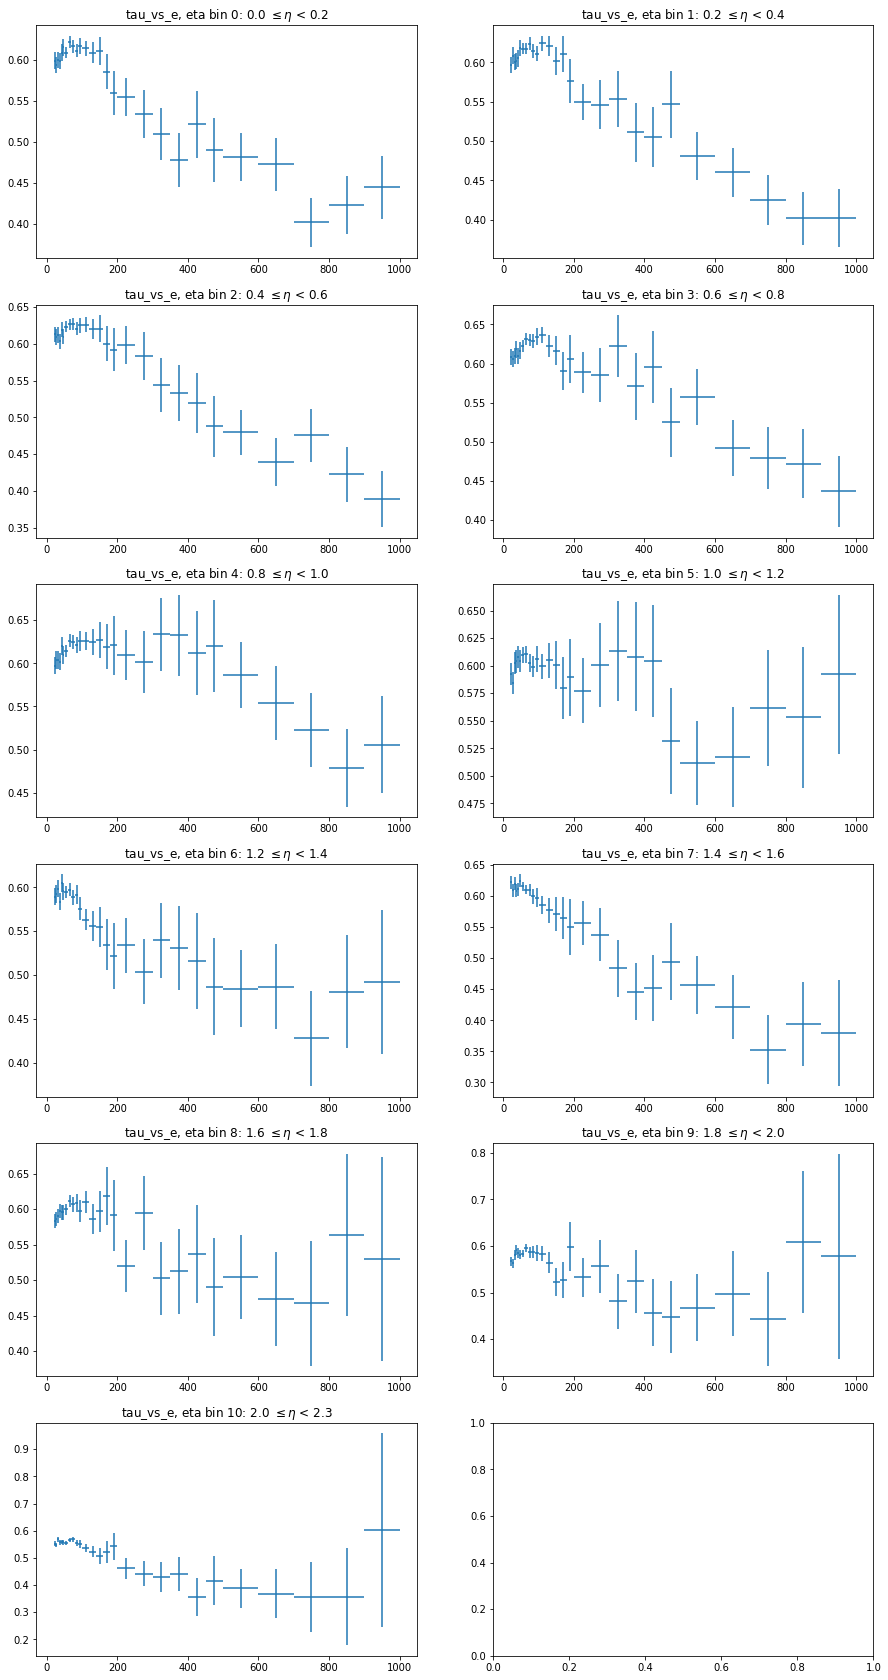

In [8]:
fig, ax = plt.subplots(math.ceil(n_eta_bins / 2), 2, figsize=(15, 30))
for i in range(n_eta_bins):
    j = int((i - (i % 2)) / 2)
    k = i % 2
    df_sel = df_e[df_e.eta_bin_id == i]
    ax[j, k].errorbar(pt_centers, df_sel.eff, xerr=pt_errors, yerr=df_sel.eff_err, ls='None')
    ax[j, k].set_title("tau_vs_e, eta bin %d: %0.1f $\leq \eta$ < %0.1f" % (i, eta_bins[i], eta_bins[i+1]))

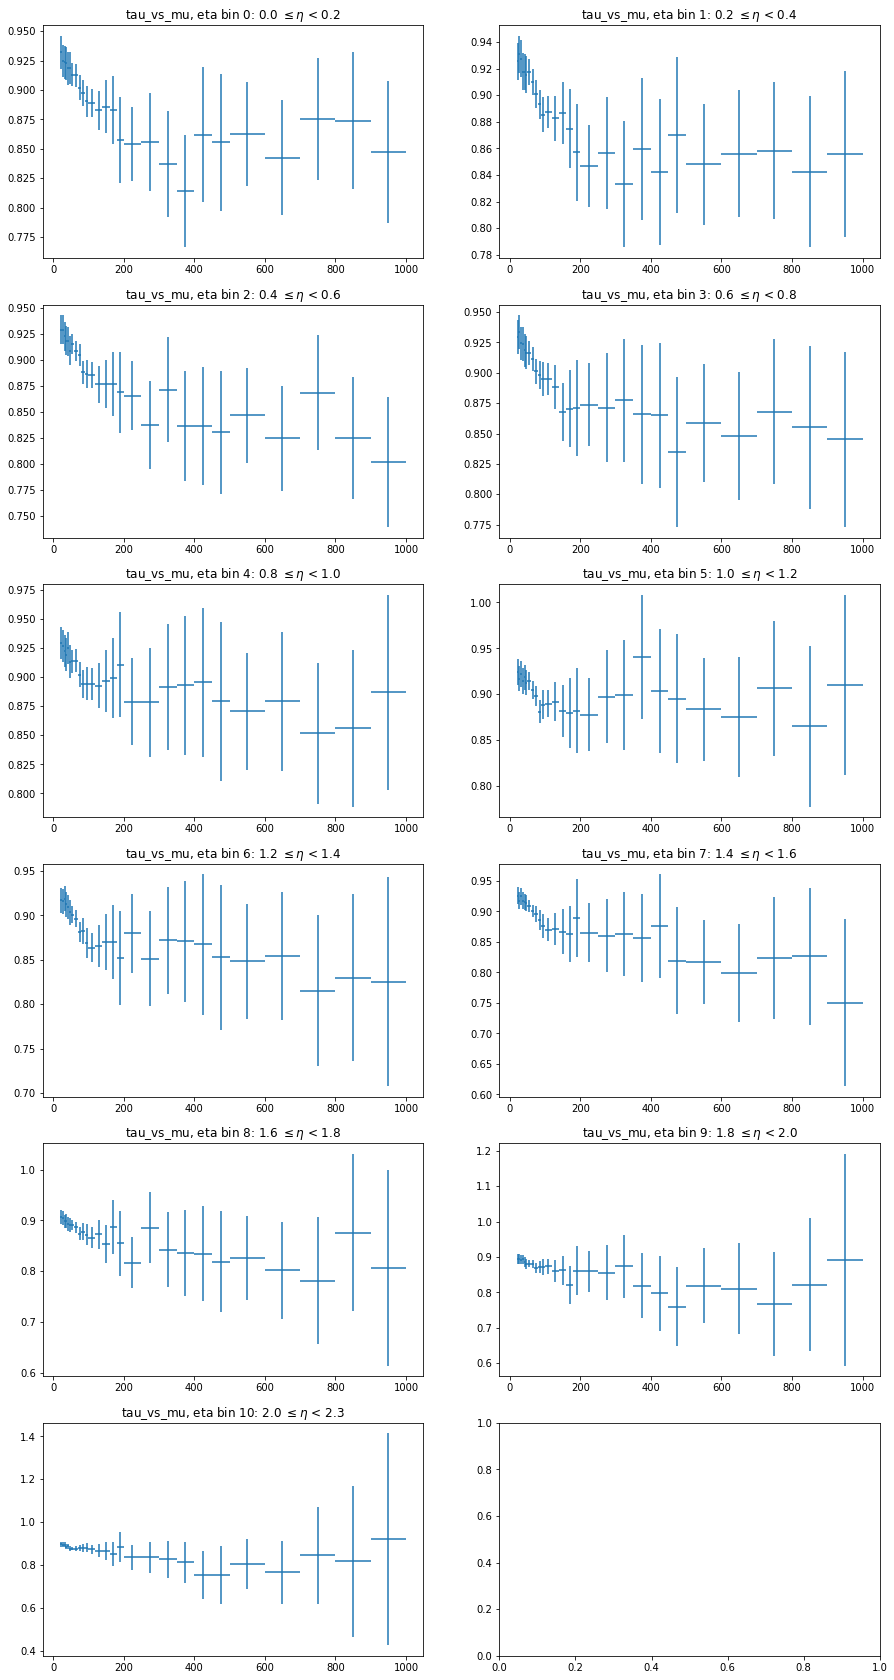

In [9]:
fig, ax = plt.subplots(math.ceil(n_eta_bins / 2), 2, figsize=(15, 30))
for i in range(n_eta_bins):
    j = int((i - (i % 2)) / 2)
    k = i % 2
    df_sel = df_mu[df_mu.eta_bin_id == i]
    ax[j, k].errorbar(pt_centers, df_sel.eff, xerr=pt_errors, yerr=df_sel.eff_err, ls='None');
    ax[j, k].set_title("tau_vs_mu, eta bin %d: %0.1f $\leq \eta$ < %0.1f" % (i, eta_bins[i], eta_bins[i+1]))

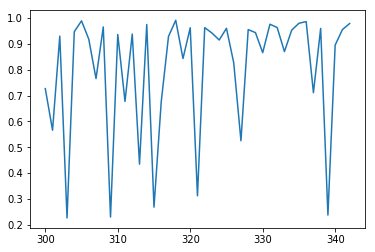

In [10]:
df_sel = df_all[(df_all.cl_idx==2) & (df_all.pt_bin_id == 0) & (df_all.eta_bin_id == 0)]
plt.plot(df_sel.epoch, df_sel.threashold)

In [29]:
#weight_df = pandas.read_hdf('20L1024N50D_relu_0723_s1p2_last_pass_weights.hdf5', 'weights')
weight_df = pandas.read_hdf('C:/Users/konst/workspace/tau-ml/tuples/training_v4/all_shuffled_weights.h5', 'weights')

In [3]:
weight_df_tau = weight_df[(weight_df.gen_tau == 1)]

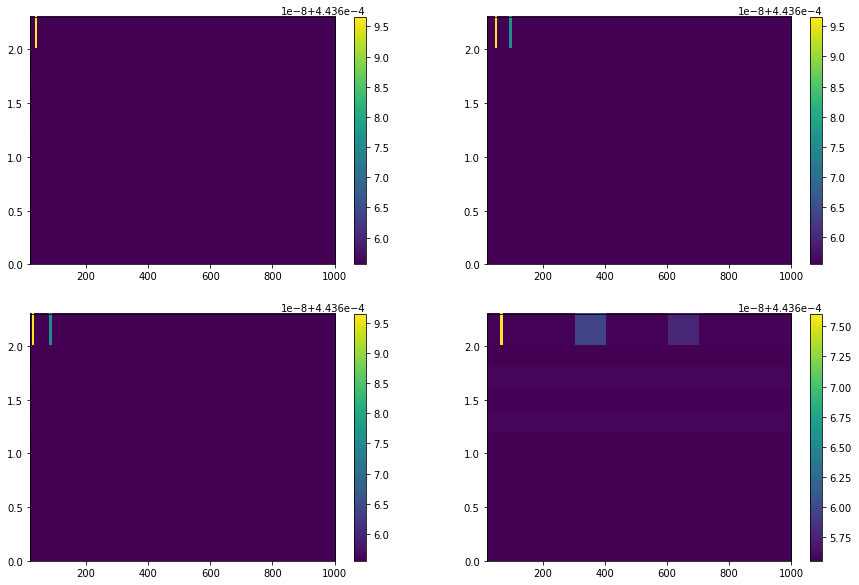

In [35]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
i = 0
for cl in ['e', 'mu', 'tau', 'jet']:
    j = int((i - (i % 2)) / 2)
    k = i % 2
    weight_df_cl = weight_df[(weight_df["gen_"+cl] == 1)]
    hist = ax[j, k].hist2d(weight_df_cl.pt, np.abs(weight_df_cl.eta), bins=[pt_bins, eta_bins],
                        weights=weight_df_cl["weight"], normed=True)#,vmin=4.4e-4, vmax=4.5e-4)#, norm=LogNorm())
    #vmin, vmax = ax[j, k].gci().get_clim()
    #print(vmin, vmax)
    fig.colorbar(hist[3], ax=ax[j, k])
    #ax[j, k].set_xscale('log')
    i += 1
    #break

KeyError: 'weight_e'

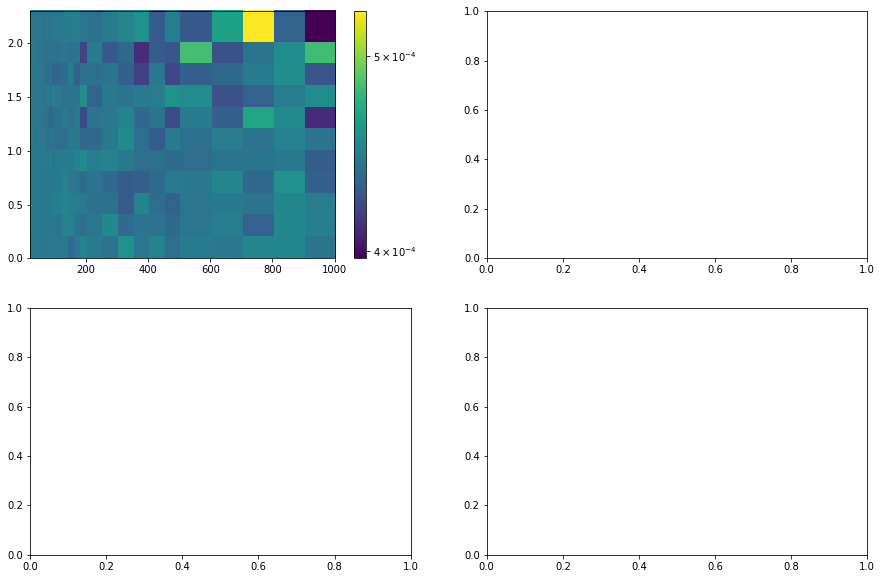

In [9]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
i = 0
for cl in ['', '_e', '_mu', '_jet']:
    j = int((i - (i % 2)) / 2)
    k = i % 2
    hist = ax[j, k].hist2d(weight_df_tau.pt, np.abs(weight_df_tau.eta), bins=[pt_bins, eta_bins],
                        weights=weight_df_tau["weight" + cl], normed=True, norm=LogNorm())
    fig.colorbar(hist[3], ax=ax[j, k])
    #ax[j, k].set_xscale('log')
    i += 1

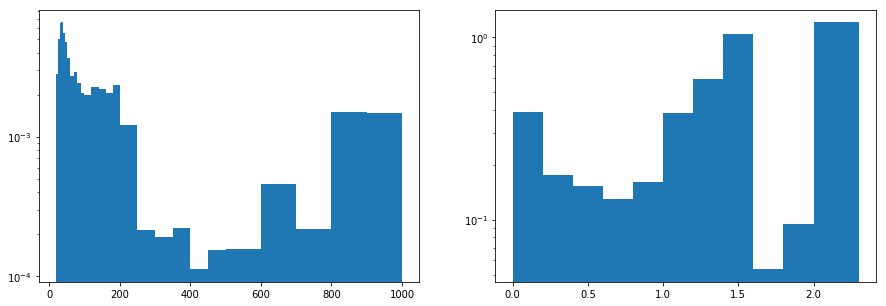

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.hist(weight_df_tau.pt, bins=pt_bins, weights=weight_df_tau.weight_jet, density=True)
ax2.hist(weight_df_tau.eta, bins=eta_bins, weights=weight_df_tau.weight_jet, density=True)
ax1.set_yscale('log')
ax2.set_yscale('log')

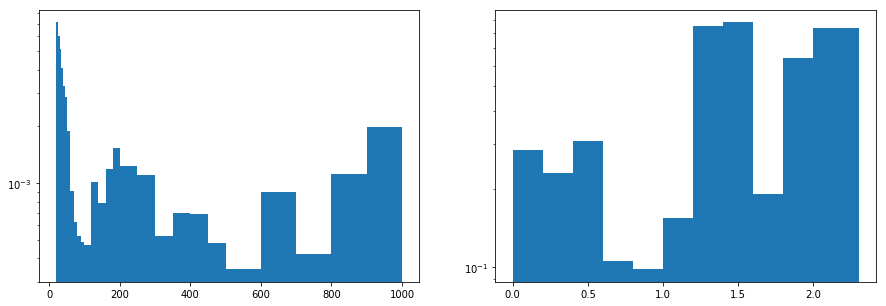

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.hist(weight_df_tau.pt, bins=pt_bins, weights=weight_df_tau.weight_e, density=True)
ax2.hist(np.abs(weight_df_tau.eta), bins=eta_bins, weights=weight_df_tau.weight_e, density=True)
ax1.set_yscale('log')
ax2.set_yscale('log')

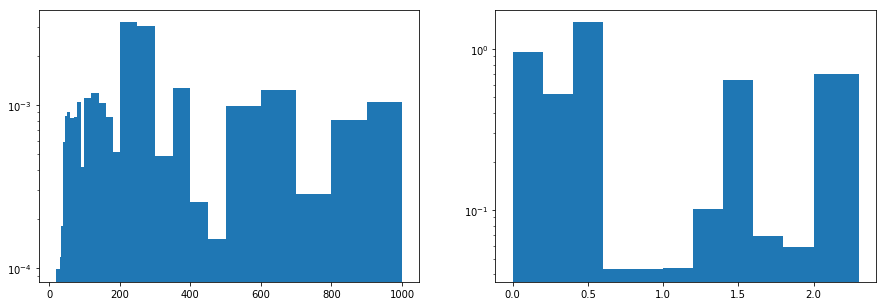

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.hist(weight_df_tau.pt, bins=pt_bins, weights=weight_df_tau.weight_mu, density=True)
ax2.hist(np.abs(weight_df_tau.eta), bins=eta_bins, weights=weight_df_tau.weight_mu, density=True)
ax1.set_yscale('log')
ax2.set_yscale('log')

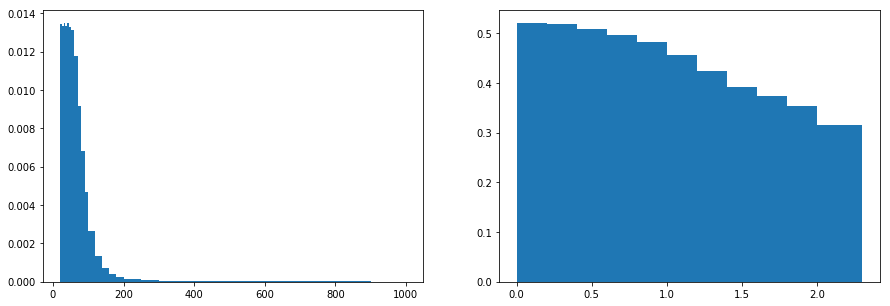

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.hist(weight_df_tau.pt, bins=pt_bins, density=True);

ax2.hist(weight_df_tau.eta, bins=eta_bins, density=True);

In [18]:
np.amin(weight_df_tau.weight),np.amin(weight_df_tau.weight_e),np.amin(weight_df_tau.weight_mu),np.amin(weight_df_tau.weight_jet)

(0.11909992986696388,
 0.03515755130353692,
 0.011496960117887882,
 0.013254055000103805)

In [19]:
np.amax(weight_df_tau.weight),np.amax(weight_df_tau.weight_e),np.amax(weight_df_tau.weight_mu),np.amax(weight_df_tau.weight_jet)

(7259.617125110908, 69851.01225919032, 2063.1823319755913, 74587.42293044594)

In [20]:
np.amax(weight_df_tau.weight)/np.amin(weight_df_tau.weight)

60953.99999999993

In [21]:
weight_df_tau.weight.mean()

1.5819448727777525

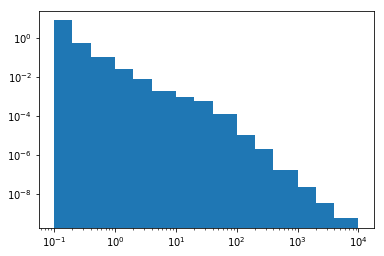

In [22]:
plt.hist(weight_df_tau.weight, bins=[0.1, 0.2, 0.4, 1, 2, 4, 10, 20, 40, 100, 200, 400, 1000, 2000, 4000, 10000], density=True)
plt.yscale('log')
plt.xscale('log')

(array([ 30219., 160580., 165891., 223266., 171838.,      0.,      0.,
             0., 366807., 257746.,      0.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.3]),
 <a list of 11 Patch objects>)

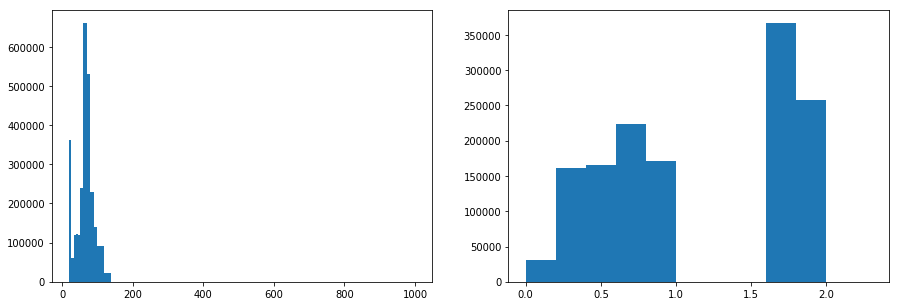

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.hist(weight_df_tau[weight_df_tau.weight_jet < 0.2].pt, bins=pt_bins)
ax2.hist(weight_df_tau[weight_df_tau.weight_jet < 0.2].eta, bins=eta_bins)